In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [95]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARMA
from random import random
from sklearn.metrics import mean_squared_error

* d1 is the Overall Data for the past years since 2007 up till 2019
* d2 is the scores of key statistics up till 2018
* d3 refers to the Changes in happiness scores up till 2018
* d4 refers to the Average happiness of foreign born up till 2018
* d5 refers to the Supporting factors up till 2018

In [96]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Table2.1')
d2 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.2')
d3 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.3')
d4 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.4')
d5 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='SupportingFactors')

In [97]:
print("(No. of countries, No. of columns) =", d1.shape)
d1 = d1.rename(columns={'country':'Country'})
# d1['Average'] = d1.groupby('Country')['Life Ladder'].transform('mean')
# d1['Rank'] = d1['Average'].rank(method='dense', ascending=False)
d1.head()

(No. of countries, No. of columns) = (1704, 26)


,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Data_2008 = pd.DataFrame(d1[(d1['year'] == 2008)])
# Data_2009 = pd.DataFrame(d1[(d1['year'] == 2009)])
# Data_2010 = pd.DataFrame(d1[(d1['year'] == 2010)])
# Data_2011 = pd.DataFrame(d1[(d1['year'] == 2011)])
# Data_2012 = pd.DataFrame(d1[(d1['year'] == 2012)])
# Data_2013 = pd.DataFrame(d1[(d1['year'] == 2013)])
# Data_2014 = pd.DataFrame(d1[(d1['year'] == 2014)])
# Data_2015 = pd.DataFrame(d1[(d1['year'] == 2015)])
# Data_2016 = pd.DataFrame(d1[(d1['year'] == 2016)])
# Data_2017 = pd.DataFrame(d1[(d1['year'] == 2017)])
# Data_2018 = pd.DataFrame(d1[(d1['year'] == 2018)])

From WHR 2018 Report

In [99]:
print("(No. of countries, No. of columns) =", d2.shape)
d2 = d2.iloc[0:157, 0:11].sort_values(by=['Country']).reset_index(drop=True)
d2.head()

(No. of countries, No. of columns) = (157, 24)


,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Afghanistan,3.6315,3.714525,3.548475,2.195918,0.331814,0.537191,0.254772,0.084552,0.191004,0.036268
1,Albania,4.5860,4.695393,4.476607,1.462148,0.915782,0.817405,0.790387,0.418669,0.149213,0.032436
2,Algeria,5.2946,5.406491,5.182709,2.208535,0.978857,1.153656,0.686599,0.077280,0.055195,0.134517
3,Angola,3.7948,3.951442,3.638158,1.530531,0.730157,1.125020,0.268986,0.000000,0.078868,0.061276
4,Argentina,6.3880,6.485014,6.290986,2.418201,1.072671,1.468341,0.743585,0.569710,0.061942,0.053507


In [100]:
print("(No. of countries, No. of columns) =", d3.shape)
d3= d3.sort_values(by=['Country']).reset_index(drop=True)
d3.head()

(No. of countries, No. of columns) = (141, 4)


,Country,Changes in happiness scores,Whisker-high,Whisker-low
0,Afghanistan,-0.688338,-0.579448,-0.797228
1,Albania,-0.791441,-0.640828,-0.942054
2,Algeria,-0.168929,-0.008211,-0.329647
3,Argentina,0.112430,0.247466,-0.022607
4,Armenia,-0.078384,0.046207,-0.202976


In [101]:
print("(No. of countries, No. of columns) =", d4.shape)
d4= d4.sort_values(by=['Country']).reset_index(drop=True)
d4.head()

(No. of countries, No. of columns) = (117, 5)


,Country,Average happiness of foreign born,Whisker-high,Whisker-low,Average happiness of locally born
0,Afghanistan,4.068487,4.268106,3.868869,3.853136
1,Argentina,5.843226,6.077020,5.609432,6.439717
2,Armenia,4.100641,4.261732,3.939550,4.417696
3,Australia,7.249348,7.331693,7.167004,7.323904
4,Austria,6.902624,7.076249,6.728999,7.260852


In [102]:
print("(No. of countries, No. of columns) =", d5.shape)
d5 = d5.sort_values(by=['country']).reset_index(drop=True)
d5 = d5.rename(columns={'country':'Country'})
d5.head()

(No. of countries, No. of columns) = (156, 15)


,Country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095703,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723633,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132812,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [103]:
data = pd.merge(d5, d2, on='Country')
data = pd.merge(data, d4, on='Country')
Main_Data = pd.merge(data, d3, on='Country')

newcol_Rank = Main_Data['Happiness score'].rank(method='dense', ascending=False)
Main_Data.insert(loc=2, column='Rank', value=newcol_Rank)

In [104]:
Main_Data.head()

,Country,Region indicator,Rank,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017",...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Average happiness of foreign born,Whisker-high_y,Whisker-low_y,Average happiness of locally born,Changes in happiness scores,Whisker-high,Whisker-low
0,Afghanistan,South Asia,100.0,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,...,0.084552,0.191004,0.036268,4.068487,4.268106,3.868869,3.853136,-0.688338,-0.579448,-0.797228
1,Argentina,Latin America and Caribbean,28.0,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,...,0.569710,0.061942,0.053507,5.843226,6.077020,5.609432,6.439717,0.112430,0.247466,-0.022607
2,Armenia,Commonwealth of Independent States,89.0,4.320565,0.046600,9.018902,8257.704102,64.962479,0.710185,0.009443,...,0.260100,0.077052,0.027643,4.100641,4.261732,3.939550,4.417696,-0.078384,0.046207,-0.202976
3,Australia,North America and ANZ,10.0,7.272051,0.044063,10.700419,44374.464844,72.650299,0.948141,0.005685,...,0.646526,0.361005,0.302352,7.249348,7.331693,7.167004,7.323904,-0.079471,0.046760,-0.205702
4,Austria,Western Europe,12.0,7.139362,0.035739,10.704917,44574.488281,72.049568,0.920177,0.005735,...,0.617242,0.242011,0.223820,6.902624,7.076249,6.728999,7.260852,-0.122659,-0.019036,-0.226282


In [105]:
Main_Data.tail()

,Country,Region indicator,Rank,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017",...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Average happiness of foreign born,Whisker-high_y,Whisker-low_y,Average happiness of locally born,Changes in happiness scores,Whisker-high,Whisker-low
101,Uzbekistan,Commonwealth of Independent States,38.0,6.096068,0.050881,8.705646,6036.897949,63.031487,0.953000,0.004418,...,0.724477,0.327792,0.258747,5.599720,5.908387,5.291052,5.778155,0.873773,0.997841,0.749705
102,Venezuela,Latin America and Caribbean,74.0,4.805554,0.076837,9.594683,14686.481445,64.674904,0.906003,0.008606,...,0.133104,0.056320,0.051632,6.085927,6.431374,5.740479,6.411774,-2.167127,-1.984303,-2.349951
103,Yemen,Middle East and North Africa,106.0,3.354938,0.047507,7.814972,2477.418457,54.797081,0.743860,0.009578,...,0.243870,0.083092,0.064146,4.583805,4.934815,4.232796,4.008655,-1.223778,-1.097288,-1.350267
104,Zambia,Sub-Saharan Africa,86.0,4.377130,0.066625,8.203148,3652.429688,53.264263,0.733560,0.009965,...,0.502600,0.221372,0.081948,5.285922,5.936035,4.635808,4.741683,-0.617167,-0.438029,-0.796305
105,Zimbabwe,Sub-Saharan Africa,99.0,3.692286,0.057806,7.544407,1890.141357,51.796772,0.752728,0.009699,...,0.405982,0.131963,0.098940,4.412927,4.821320,4.004533,4.161923,-0.278288,-0.137179,-0.419397


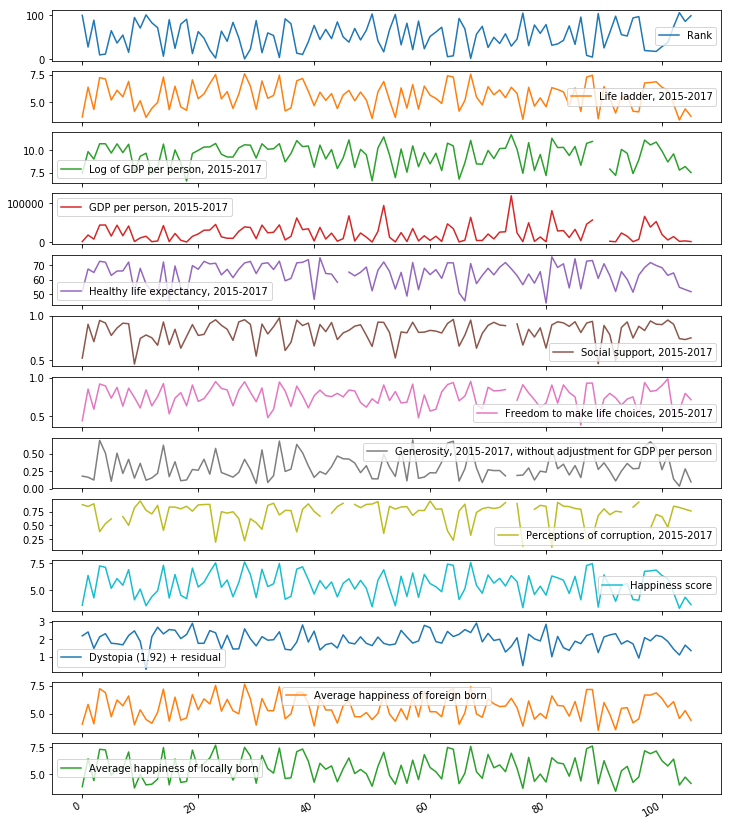

In [106]:
df = Main_Data[[
       'Rank',
       'Life ladder, 2015-2017',
       'Log of GDP per person, 2015-2017', 
       'GDP per person, 2015-2017',
       'Healthy life expectancy, 2015-2017', 
       'Social support, 2015-2017',
       'Freedom to make life choices, 2015-2017',
       'Generosity, 2015-2017, without adjustment for GDP per person',
       'Perceptions of corruption, 2015-2017',
       'Happiness score',
       'Dystopia (1.92) + residual',
       'Average happiness of foreign born',
       'Average happiness of locally born'
        ]]
df.plot(subplots=True, figsize=(12, 16));

## Basic Analysis of the Indicators

C:\Users\tkjie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\tkjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 864x864 with 0 Axes>

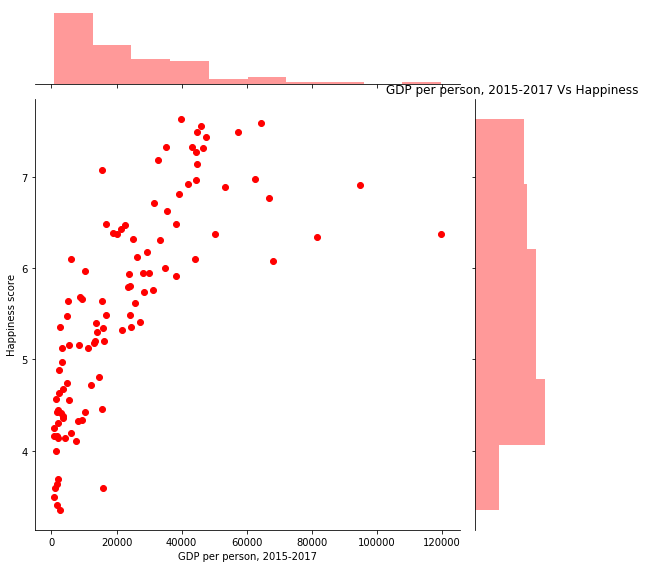

In [107]:
plt.figure(figsize=(12,12))
sb.jointplot(x = 'GDP per person, 2015-2017', y = 'Happiness score', data = df, size=8, color='red')
# plt.ylabel('Happiness score')
# plt.xlabel('GDP per person, 2015-2017')
plt.title('GDP per person, 2015-2017 Vs Happiness')
plt.show()

In [108]:
print("Comparing between GDP per capita and Average Happiness of Foreigners")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Average happiness of foreign born'],
    mode = 'markers'
)
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Average Happiness of Foreigners


In [109]:
print("Comparing between GDP per capita and Average Happiness of Locals")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Average happiness of locally born'],
    mode = 'markers'
)
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Average Happiness of Locals


From the gradient plot below, it seems that individuals with lower income are more happy than individuals with higher income.

In [110]:
print("Comparing between GDP per capita and Happiness Score")
x = df['Happiness score']
y = df['GDP per person, 2015-2017']
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

Comparing between GDP per capita and Happiness Score


In [111]:
print("Comparing between GDP per capita and Perceptions of corruption")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Perceptions of corruption, 2015-2017'],
    mode = 'markers')
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Perceptions of corruption


In [112]:
print("Comparing between Life Expectancy and Social Support")
trace = go.Scatter(
    x = df['Healthy life expectancy, 2015-2017'],
    y = df['Social support, 2015-2017'],
    mode = 'markers')
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between Life Expectancy and Social Support


## WHR Annual Analysis - In the United States

In [113]:
# for i in range(2007, 2019):
#     print('print(Data_' + str(i) + ".shape)")

In [114]:
# print(Data_2008.shape)
# print(Data_2009.shape)
# print(Data_2010.shape)
# print(Data_2011.shape)
# print(Data_2012.shape)
# print(Data_2013.shape)
# print(Data_2014.shape)
# print(Data_2015.shape)
# print(Data_2016.shape)
# print(Data_2017.shape)

In [115]:
# for i in range(2007, 2019):
#     print('US_' + str(i) + "_Data = pd.DataFrame(Data_" + str(i) + "[(Data_" + str(i) + "['Country'] == 'United States')])")

In [116]:
# US_2008_Data = pd.DataFrame(Data_2008[(Data_2008['Country'] == 'United States')])
# US_2009_Data = pd.DataFrame(Data_2009[(Data_2009['Country'] == 'United States')])
# US_2010_Data = pd.DataFrame(Data_2010[(Data_2010['Country'] == 'United States')])
# US_2011_Data = pd.DataFrame(Data_2011[(Data_2011['Country'] == 'United States')])
# US_2012_Data = pd.DataFrame(Data_2012[(Data_2012['Country'] == 'United States')])
# US_2013_Data = pd.DataFrame(Data_2013[(Data_2013['Country'] == 'United States')])
# US_2014_Data = pd.DataFrame(Data_2014[(Data_2014['Country'] == 'United States')])
# US_2015_Data = pd.DataFrame(Data_2015[(Data_2015['Country'] == 'United States')])
# US_2016_Data = pd.DataFrame(Data_2016[(Data_2016['Country'] == 'United States')])
# US_2017_Data = pd.DataFrame(Data_2017[(Data_2017['Country'] == 'United States')])

In [117]:
# for i in range(2008, 2018):
#     print('(US_' + str(i) + "_Data['Life Ladder']), ")

In [118]:
# print(US_2008_Data['Life Ladder'])
# print(US_2009_Data['Life Ladder'])
# print(US_2010_Data['Life Ladder'])
# print(US_2011_Data['Life Ladder'])
# print(US_2012_Data['Life Ladder'])
# print(US_2013_Data['Life Ladder'])
# print(US_2014_Data['Life Ladder'])
# print(US_2015_Data['Life Ladder'])
# print(US_2016_Data['Life Ladder'])
# print(US_2017_Data['Life Ladder'])

In [119]:
US_Data =  pd.DataFrame(d1[(d1['Country name'] == "United States")])
print("(No. of Years, No. of columns) =", US_Data.shape)

(No. of Years, No. of columns) = (13, 26)


In [120]:
US_Data = US_Data[['Year', 'Life Ladder']]
US_Data_LL = list(US_Data['Life Ladder'])
US_Data
# US_Data.sort_values(by = 'Life Ladder', ascending = False)

,Year,Life Ladder
1604,2006,7.181794
1605,2007,7.512688
1606,2008,7.280386
1607,2009,7.158032
1608,2010,7.163616
1609,2011,7.115139
1610,2012,7.026227
1611,2013,7.249285
1612,2014,7.151114
1613,2015,6.863947


In [121]:
# Create a trace
trace = go.Scatter(
    x = US_Data['Year'],
    y = US_Data['Life Ladder'])
data = [trace]
iplot(data)

In [122]:
US_Data_LL = list(US_Data['Life Ladder'])
US_Data_LL

[7.181793689727783,
 7.512687683105469,
 7.280385971069336,
 7.158032417297363,
 7.163616180419922,
 7.115138530731201,
 7.026226997375488,
 7.2492852210998535,
 7.151114463806152,
 6.863946914672852,
 6.803599834442139,
 6.991759300231934,
 6.882684707641602]

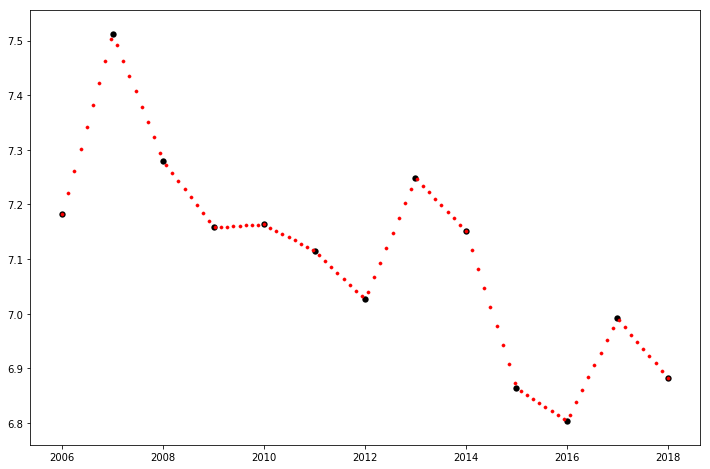

In [123]:
x = np.array(tuple(range(2006,2019)))
y = np.array(US_Data_LL)

t = np.linspace(0, 1, len(x))
t2 = np.linspace(0, 1, 100)
# One-dimensional linear interpolation.
x2 = np.interp(t2, t, x)
y2 = np.interp(t2, t, y)
# Plot x,y data
plt.figure(figsize=(12,8))
plt.scatter(x, y, marker='o', color='k', s=40, lw=0.)
plt.scatter(x2, y2, marker='o', color='r', s=10, lw=0.5)

In [124]:
x = np.array(tuple(range(0,13)))
y = np.array(US_Data_LL)
z = np.polyfit(x, y, 10)
f = np.poly1d(z)
x_new = np.linspace(0, 12, 3270)
y_new = f(x_new)
print("The interpolated y-values are:\n", y_new)
print("Total:", len(y_new), "datapoints generated for this specific diagram.")
trace1 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Data',
    marker=dict(
        size=12))
trace2 = go.Scatter(
    x=x_new,
    y=y_new,
    mode='lines',
    name='Fit')
annotation = go.Annotation(
    x=1,
    y=1,
    showarrow=False)
layout = go.Layout(title='Polynomial Fit in Python',
                   annotations=[annotation])
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

The interpolated y-values are:
 [7.18180613 7.17978597 7.1778512  ... 6.87096547 6.87679398 6.8827565 ]
Total: 3270 datapoints generated for this specific diagram.


C:\Users\tkjie\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [125]:
Values_for_13yr = pd.DataFrame({'Daily Life Ladder': y_new})
Values_for_13yr.head()

,Daily Life Ladder
0,7.181806
1,7.179786
2,7.177851
3,7.176001
4,7.174233


In [126]:
Values_for_13yr.tail()

,Daily Life Ladder
3265,6.859704
3266,6.865269
3267,6.870965
3268,6.876794
3269,6.882756


### Dataframe Concatenation

In [127]:
Stocks = pd.read_csv('Data\Stocks\S&P 500 (^GSPC)_2005to2018_daily.csv')
Stocks["Average"] = (Stocks["High"] + Stocks["Low"])/2
Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,1187.450012


In [128]:
Stocks.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
3518,21/12/2018,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,7609010000,2456.479981
3519,24/12/2018,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,2380.720093
3520,26/12/2018,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,2407.170044
3521,27/12/2018,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,2443.520019
3522,28/12/2018,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,2496.579956


In [129]:
for i in range(2006, 2019):
    print('Stocks_' + str(i) + " = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/" + str(i) + "')])")

Stocks_2006 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2006')])
Stocks_2007 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2007')])
Stocks_2008 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2008')])
Stocks_2009 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2009')])
Stocks_2010 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2010')])
Stocks_2011 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2011')])
Stocks_2012 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2012')])
Stocks_2013 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2013')])
Stocks_2014 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2014')])
Stocks_2015 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2015')])
Stocks_2016 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2016')])
Stocks_2017 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2017')])
Stocks_2018 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2018')])


In [130]:
Stocks_2006 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2006')])
Stocks_2007 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2007')])
Stocks_2008 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2008')])
Stocks_2009 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2009')])
Stocks_2010 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2010')])
Stocks_2011 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2011')])
Stocks_2012 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2012')])
Stocks_2013 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2013')])
Stocks_2014 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2014')])
Stocks_2015 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2015')])
Stocks_2016 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2016')])
Stocks_2017 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2017')])
Stocks_2018 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2018')])

In [131]:
# for i in range(2006, 2019):
#     print('Stocks_' + str(i) + ", ")

In [132]:
frames = [Stocks_2006, Stocks_2007, Stocks_2008, Stocks_2009, Stocks_2010, Stocks_2011, Stocks_2012, Stocks_2013, Stocks_2014, 
          Stocks_2015, Stocks_2016, Stocks_2017, Stocks_2018]
Resulting_Data = pd.concat(frames)
print("Total number of Working days:", len(Resulting_Data))
Resulting_Data.head()

Total number of Working days: 3270


,Date,Open,High,Low,Close,Adj Close,Volume,Average
253,3/1/2006,1248.290039,1270.219971,1245.739990,1268.800049,1268.800049,2554570000,1257.979981
254,4/1/2006,1268.800049,1275.369995,1267.739990,1273.459961,1273.459961,2515330000,1271.554993
255,5/1/2006,1273.459961,1276.910034,1270.300049,1273.479980,1273.479980,2433340000,1273.605041
256,6/1/2006,1273.479980,1286.089966,1273.479980,1285.449951,1285.449951,2446560000,1279.784973
257,9/1/2006,1285.449951,1290.780029,1284.819946,1290.150024,1290.150024,2301490000,1287.799988


In [133]:
Resulting_Data.reset_index(drop=True)
Resulting_Data.index = np.arange(1, len(Resulting_Data)+1)
Values_for_13yr.reset_index(drop=True)
Values_for_13yr.index = np.arange(1, len(Resulting_Data)+1)
LLwithStocks = Resulting_Data.join(Values_for_13yr)
LLwithStocks.head().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Average,Daily Life Ladder
1,3/1/2006,1248.29,1270.22,1245.74,1268.80,1268.80,2554570000,1257.98,7.18
2,4/1/2006,1268.80,1275.37,1267.74,1273.46,1273.46,2515330000,1271.55,7.18
3,5/1/2006,1273.46,1276.91,1270.30,1273.48,1273.48,2433340000,1273.61,7.18
4,6/1/2006,1273.48,1286.09,1273.48,1285.45,1285.45,2446560000,1279.78,7.18
5,9/1/2006,1285.45,1290.78,1284.82,1290.15,1290.15,2301490000,1287.80,7.17


In [134]:
LLwithStocks.tail().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Average,Daily Life Ladder
3266,21/12/2018,2465.38,2504.41,2408.55,2416.62,2416.62,7609010000,2456.48,6.86
3267,24/12/2018,2400.56,2410.34,2351.10,2351.10,2351.10,2613930000,2380.72,6.87
3268,26/12/2018,2363.12,2467.76,2346.58,2467.70,2467.70,4233990000,2407.17,6.87
3269,27/12/2018,2442.50,2489.10,2397.94,2488.83,2488.83,4096610000,2443.52,6.88
3270,28/12/2018,2498.77,2520.27,2472.89,2485.74,2485.74,3702620000,2496.58,6.88


In [135]:
trace = go.Scatter(
    x = LLwithStocks['Date'],
    y = LLwithStocks['Daily Life Ladder'])
data = [trace]
iplot(data)

In [136]:
# sb.lineplot(x="Date", y="Daily Life Ladder", data=LLwithStocks)

In [137]:
trace = go.Scatter(
    x = US_Data['Year'],
    y = US_Data['Life Ladder'])
data = [trace]
iplot(data)

In [138]:
# for i in range(2007, 2018):
#     print('Data_' + str(i) + " = pd.DataFrame(d1[(d1['year'] == " + str(i) + ")])")

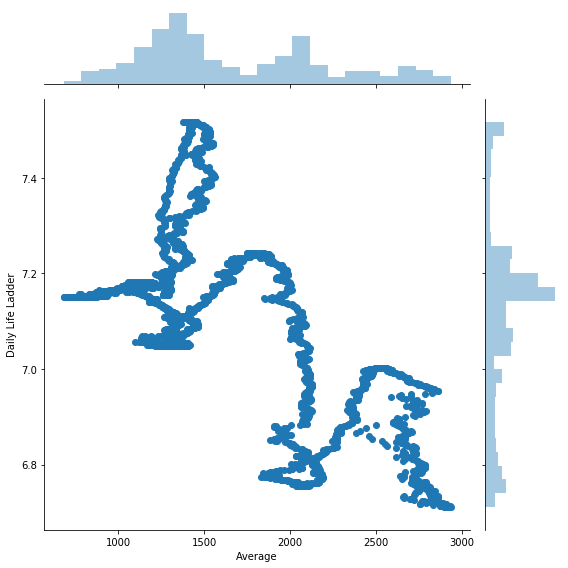

In [139]:
sb.jointplot(x = LLwithStocks['Average'], y = LLwithStocks['Daily Life Ladder'], height = 8)

In [140]:
print("Comparing between Average Stocks and Happiness Result in the US")
trace = go.Scatter(
    x = LLwithStocks['Average'],
    y = LLwithStocks['Daily Life Ladder'],
    mode = 'markers')
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between Average Stocks and Happiness Result in the US


## Prediction of Time Series Data - Time and Life Ladder in the US

### Trying out on Exponential Smoothing

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\

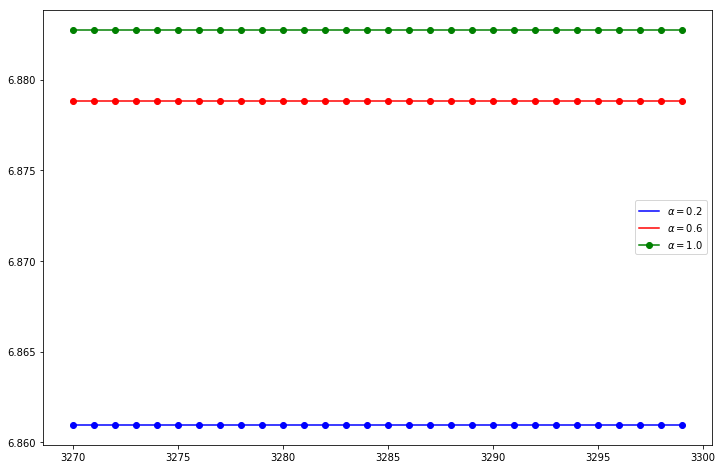

In [141]:
plt.figure(figsize=(12,8))
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(Values_for_13yr).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(30).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
# fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(Values_for_13yr).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(30).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
# fit2.fittedvalues.plot(marker='o', color='red')

fit3 = SimpleExpSmoothing(Values_for_13yr).fit()
fcast3 = fit3.forecast(30).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
# fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\tsa\

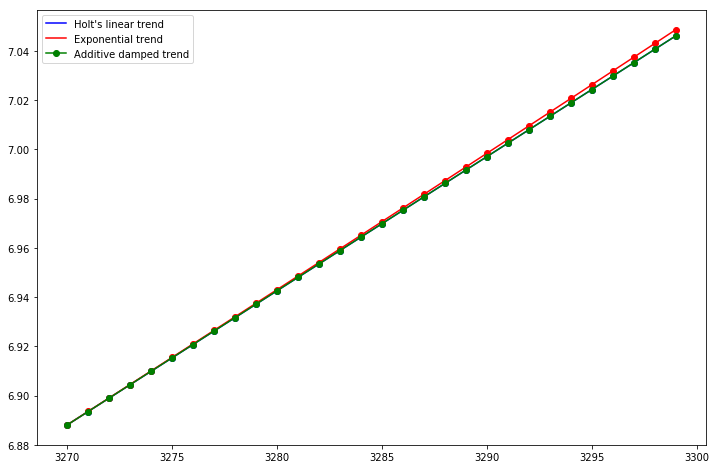

In [142]:
plt.figure(figsize=(12,8))
fit1 = Holt(LLwithStocks['Daily Life Ladder']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(30).rename("Holt's linear trend")

fit2 = Holt(LLwithStocks['Daily Life Ladder'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(30).rename("Exponential trend")

fit3 = Holt(LLwithStocks['Daily Life Ladder'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(30).rename("Additive damped trend")

# fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
# fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
# fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

In [143]:
# LLwithStocks['Daily Life Ladder'], len(LLwithStocks)

### Trying out on Moving Average Prediction

1         NaN
2         NaN
3    7.179814
4    7.177879
5    7.176028
Name: Daily Life Ladder, dtype: float64


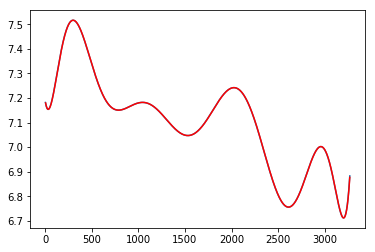

In [144]:
rolling = LLwithStocks['Daily Life Ladder'].rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head())
# plot original and transformed dataset
LLwithStocks['Daily Life Ladder'].plot()
rolling_mean.plot(color='red')
plt.show()

In [145]:
Some_Data = pd.DataFrame(LLwithStocks['Daily Life Ladder'].values)
width = 3
lag1 = Some_Data.shift(1)
lag3 = Some_Data.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
some_dataframe = pd.concat([means, lag1, Some_Data], axis=1)
some_dataframe.columns = ['mean', 't-1', 't+1']
print(some_dataframe.head(10))

       mean       t-1       t+1
0       NaN       NaN  7.181806
1       NaN  7.181806  7.179786
2       NaN  7.179786  7.177851
3       NaN  7.177851  7.176001
4  7.179814  7.176001  7.174233
5  7.177879  7.174233  7.172547
6  7.176028  7.172547  7.170943
7  7.174260  7.170943  7.169417
8  7.172574  7.169417  7.167970
9  7.170969  7.167970  7.166601


Test MSE: 0.000


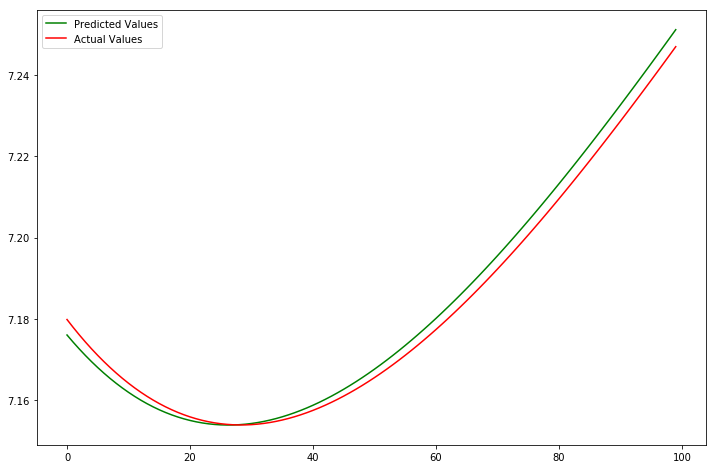

In [146]:
plt.figure(figsize=(12,8))
X = LLwithStocks['Daily Life Ladder'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()
# zoom plot
# plt.figure(figsize=(12,8))
plt.plot(test[0:100], color='g', label='Predicted Values')
plt.plot(predictions[0:100], color='red', label='Actual Values')
plt.legend()
plt.show()

## WHR Life Ladder Analysis in Different Regions
Let's look at the life ladder results, or also known as the main Happiness results across the other regions. There are in total 10 regions classified in the dataframe.

First, a look at life ladder results in the world.

10
Sub-Saharan Africa                    24
Western Europe                        20
Middle East and North Africa          14
Central and Eastern Europe            14
Commonwealth of Independent States    12
Latin America and Caribbean           10
North America and ANZ                  4
South Asia                             4
East Asia                              2
Southeast Asia                         2
Name: Region indicator, dtype: int64


[Text(0, 0, 'South Asia'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Commonwealth of Independent States'),
 Text(0, 0, 'North America and ANZ'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Middle East and North Africa'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'East Asia'),
 Text(0, 0, 'Southeast Asia')]

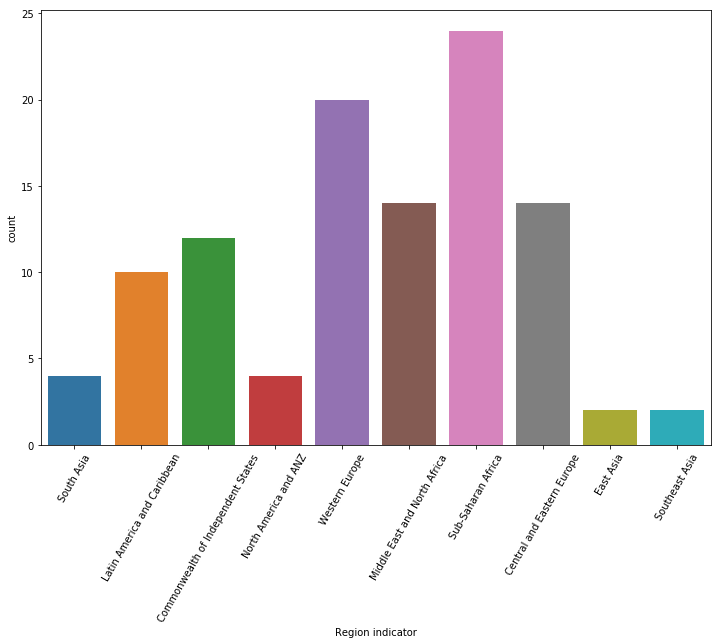

In [147]:
print(len(Main_Data["Region indicator"].unique()))
# print(Main_Data.shape, "\n")
print(Main_Data['Region indicator'].value_counts())
plt.figure(figsize=(12,8))
sb.countplot(Main_Data['Region indicator']).set_xticklabels(labels=Main_Data['Region indicator'].unique(), rotation=60)

#### World Analysis of Life Ladder

In [148]:
Boxplot_of_Life_Ladder = go.Box(x=Main_Data["Life ladder, 2015-2017"])
data = [Boxplot_of_Life_Ladder]
iplot(data)

In [149]:
SubSaharan_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Sub-Saharan Africa'])
print("(No. of countries, No. of columns) =", SubSaharan_Data.shape)
American_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'North America and ANZ'])
print("(No. of countries, No. of columns) =", American_Data.shape)
WesternEurope_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Western Europe'])
print("(No. of countries, No. of columns) =", WesternEurope_Data.shape)
CentralandEasternEurope_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Central and Eastern Europe'])
print("(No. of countries, No. of columns) =", CentralandEasternEurope_Data.shape)
MiddleEastandNorthAfrica_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Middle East and North Africa'])
print("(No. of countries, No. of columns) =", MiddleEastandNorthAfrica_Data.shape)
CIS_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Commonwealth of Independent States'])
print("(No. of countries, No. of columns) =", CIS_Data.shape)
LatinAmericaandCaribbean_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Latin America and Caribbean'])
print("(No. of countries, No. of columns) =", LatinAmericaandCaribbean_Data.shape)
SouthAsia_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'South Asia'])
print("(No. of countries, No. of columns) =", SouthAsia_Data.shape)
EastAsiaData = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'East Asia'])
print("(No. of countries, No. of columns) =", EastAsiaData.shape)
SoutheastAsia_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Southeast Asia'])
print("(No. of countries, No. of columns) =", SoutheastAsia_Data.shape)

(No. of countries, No. of columns) = (24, 33)
(No. of countries, No. of columns) = (4, 33)
(No. of countries, No. of columns) = (20, 33)
(No. of countries, No. of columns) = (14, 33)
(No. of countries, No. of columns) = (14, 33)
(No. of countries, No. of columns) = (12, 33)
(No. of countries, No. of columns) = (10, 33)
(No. of countries, No. of columns) = (4, 33)
(No. of countries, No. of columns) = (2, 33)
(No. of countries, No. of columns) = (2, 33)


In [150]:
trace0 = go.Box(x=SubSaharan_Data["Life ladder, 2015-2017"], name='SS Africa')
trace1 = go.Box(x=American_Data["Life ladder, 2015-2017"], name='US & ANZ')
trace2 = go.Box(x=WesternEurope_Data["Life ladder, 2015-2017"], name='West Euro')
trace3 = go.Box(x=CentralandEasternEurope_Data["Life ladder, 2015-2017"], name='Cent. & East Euro')
trace4 = go.Box(x=MiddleEastandNorthAfrica_Data["Life ladder, 2015-2017"], name='Mid East & Africa')
trace5 = go.Box(x=CIS_Data["Life ladder, 2015-2017"], name='CIS')
trace6 = go.Box(x=LatinAmericaandCaribbean_Data["Life ladder, 2015-2017"], name='South America')
trace7 = go.Box(x=SouthAsia_Data["Life ladder, 2015-2017"], name='South Asia')
trace8 = go.Box(x=EastAsiaData["Life ladder, 2015-2017"], name='East Asia')
trace9 = go.Box(x=SoutheastAsia_Data["Life ladder, 2015-2017"], name='SEA')

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]
iplot(data)

In [151]:
hist_data = [MiddleEastandNorthAfrica_Data["Life ladder, 2015-2017"], American_Data["Life ladder, 2015-2017"],
             American_Data["Life ladder, 2015-2017"], CentralandEasternEurope_Data["Life ladder, 2015-2017"]]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
iplot(fig)

In [152]:
x = SubSaharan_Data["Life ladder, 2015-2017"]
hist_data = [x]
group_labels = ['distplot']
fig = ff.create_distplot(hist_data, group_labels)
iplot(fig)

#### Let's analyse a specific region. The Middle Eastern region, where there are 14 countries in total.

In [153]:
# # Create traces
# trace0 = go.Scatter(
#     x = data_Rank,
#     y = data['Rank'],
#     mode = 'lines',
#     name = 'lines'
# )
# iplot(trace0)

In [154]:
# data_Rank = data['Rank']